In [18]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def read_df_from_pickle(path):
    with open(path, "rb") as f:
        df = pickle.load(f)
    return df



In [7]:
sharp_df = read_df_from_pickle("../data/SHARP/SHARP.pkl")

In [10]:
sharp_df

,T_REC,region_type,region_no,NOAA_ARS,params,magnetogram,label
0,2015-12-23 01:12:00,harp,6206,12473,"[-0.0100475028260637, 1.2602700352173024, 0.99...","[[-6.0, -4.800000000000001, -2.800000000000000...",1
1,2015-12-23 02:48:00,harp,6206,12473,"[0.066513399626304, 1.2994691822566444, 1.0664...","[[-21.200000000000003, -19.6, -18.3, -17.40000...",1
2,2015-12-23 04:24:00,harp,6206,12473,"[0.1669003090659236, 1.328868542536151, 1.1183...","[[-2.7, -3.6, -5.4, -7.1000000000000005, -8.1,...",1
3,2015-12-23 06:00:00,harp,6206,12473,"[0.2331366084904823, 1.2643052415301756, 1.161...","[[-7.4, -3.8000000000000003, -0.5, 1.200000000...",1
4,2015-12-23 07:36:00,harp,6206,12473,"[0.2683990988316146, 1.29255168572029, 1.14740...","[[-10.200000000000001, -12.3, -14.700000000000...",1
...,...,...,...,...,...,...,...
459,2010-05-04 21:12:00,harp,2,11064,"[-0.0008347801243265, -1.420259872620072, -0.7...","[[-2.6, 2.5, -2.1, -6.0, -0.5, 2.7, -5.3000000...",0
460,2010-05-04 22:48:00,harp,2,11064,"[0.1030466103400896, -1.420259872620072, -0.73...","[[-6.9, -7.4, -7.9, 1.1, 7.800000000000001, 1....",0
461,2010-05-05 00:36:00,harp,2,11064,"[0.0387163914745106, -1.420259872620072, -0.73...","[[0.8, -1.6, 1.2000000000000002, 0.4, -1.0, 5....",0
462,2010-05-05 02:12:00,harp,2,11064,"[0.11257701313499, -1.420259872620072, -0.7403...","[[21.6, 31.200000000000003, 32.1, 22.5, 4.0, -...",0


In [26]:
magnetograms = sharp_df[["NOAA_ARS", "region_no", "magnetogram","label"]]

In [27]:
magnetograms

,NOAA_ARS,region_no,magnetogram,label
0,12473,6206,"[[-6.0, -4.800000000000001, -2.800000000000000...",1
1,12473,6206,"[[-21.200000000000003, -19.6, -18.3, -17.40000...",1
2,12473,6206,"[[-2.7, -3.6, -5.4, -7.1000000000000005, -8.1,...",1
3,12473,6206,"[[-7.4, -3.8000000000000003, -0.5, 1.200000000...",1
4,12473,6206,"[[-10.200000000000001, -12.3, -14.700000000000...",1
...,...,...,...,...
459,11064,2,"[[-2.6, 2.5, -2.1, -6.0, -0.5, 2.7, -5.3000000...",0
460,11064,2,"[[-6.9, -7.4, -7.9, 1.1, 7.800000000000001, 1....",0
461,11064,2,"[[0.8, -1.6, 1.2000000000000002, 0.4, -1.0, 5....",0
462,11064,2,"[[21.6, 31.200000000000003, 32.1, 22.5, 4.0, -...",0


In [53]:
magnetograms.iloc[100, 2].shape

(458, 639)

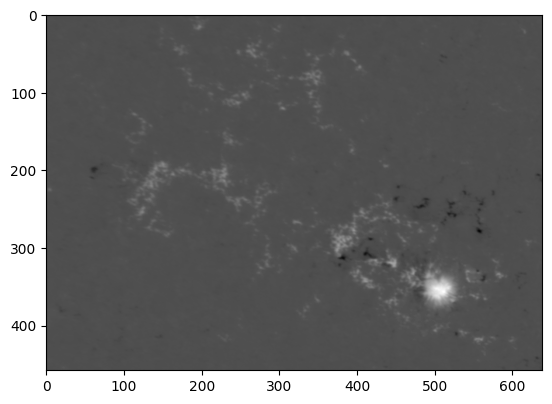

In [51]:
plt.imshow(magnetograms.iloc[100, 2].squeeze(), cmap="gray")

In [30]:

# Function to plot each magnetogram with its histogram, region number, and NOAA number
def plot_magnetograms_from_df(df):
    for idx, row in df.iterrows():
        image = row['magnetogram']
        region_number = row['region_no']
        noaa_number = row['NOAA_ARS']
        label = row['label'] 

        fig, axes = plt.subplots(1, 2, figsize=(12, 6))

        # Plot the magnetogram image
        ax1 = axes[0]
        img = ax1.imshow(image, cmap='gray')
        ax1.set_title(f'Region: {region_number}, NOAA: {noaa_number}, Label: {label}')
        ax1.axis('off')
        fig.colorbar(img, ax=ax1, orientation='vertical')

        # Plot the histogram
        ax2 = axes[1]
        ax2.hist(image.ravel(), bins=256, color='gray', alpha=0.75)
        ax2.set_title('Histogram')
        ax2.set_xlabel('Pixel Intensity')
        ax2.set_ylabel('Frequency')

        plt.tight_layout()
        plt.show()




In [ ]:
plot_magnetograms_from_df(magnetograms)

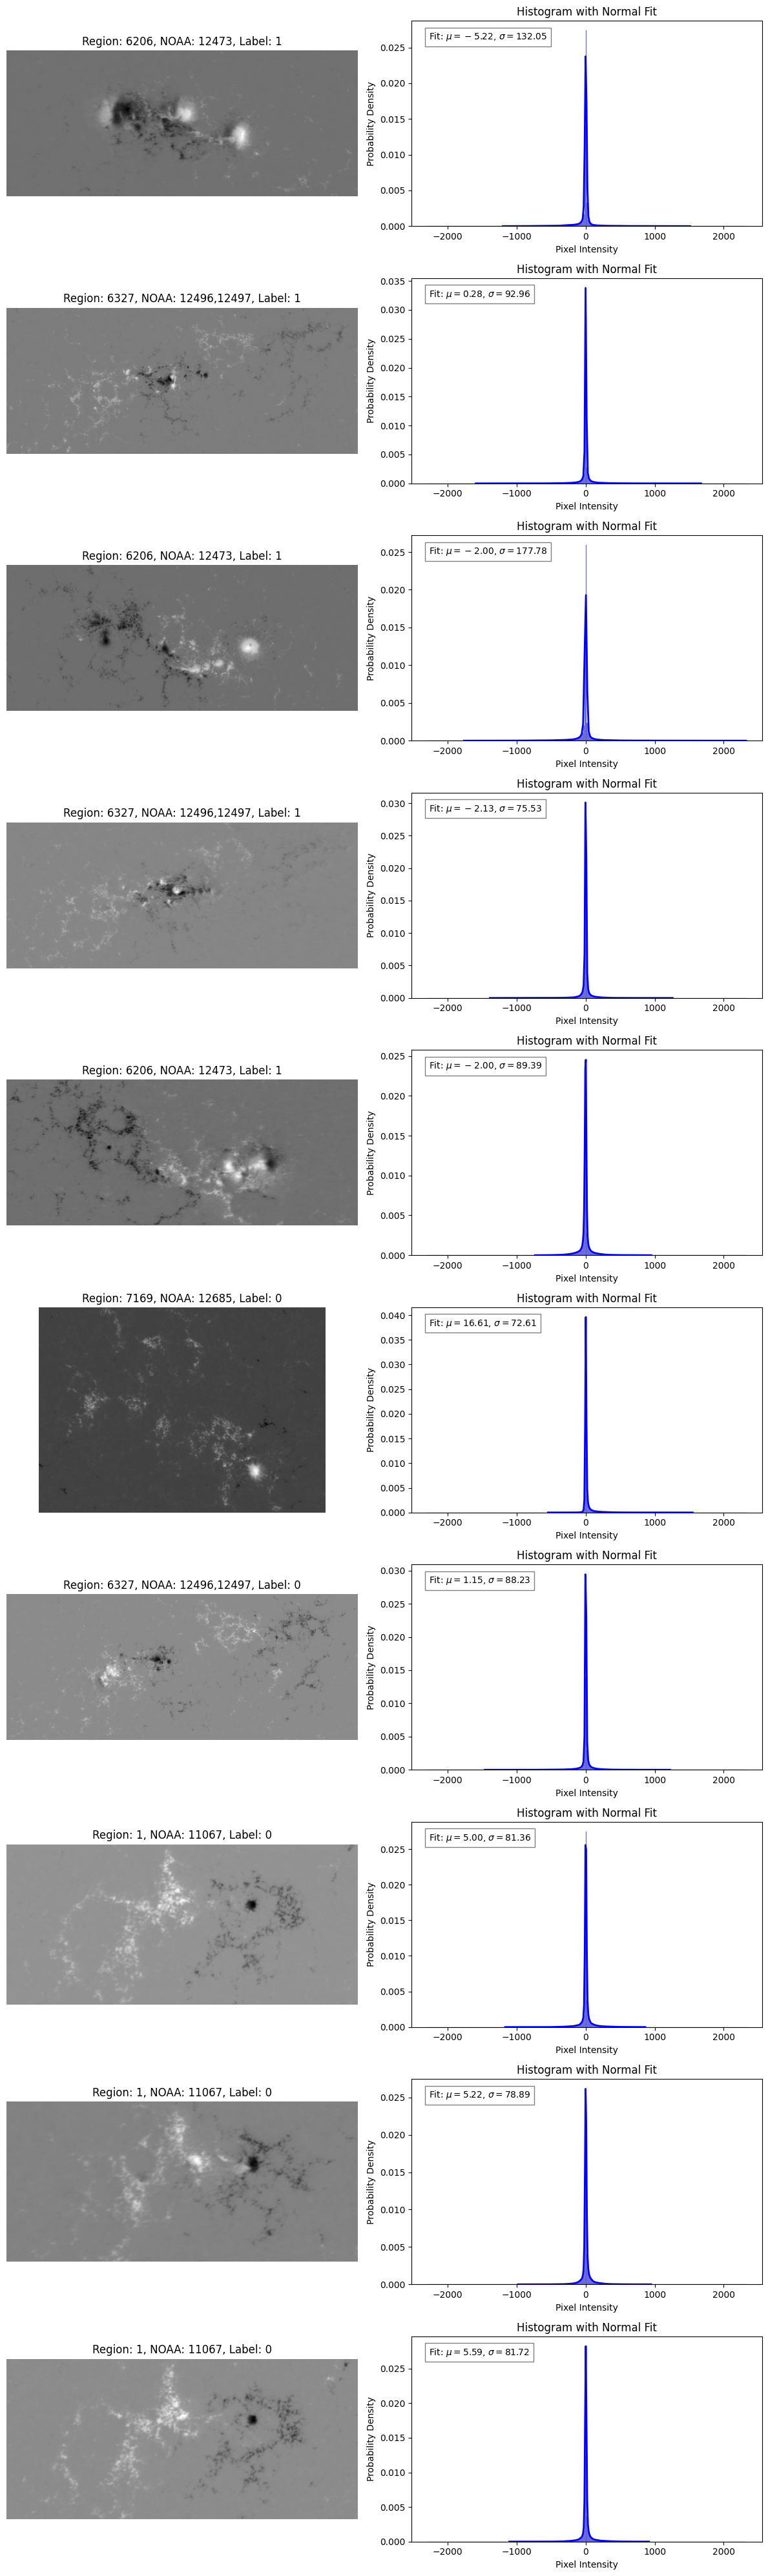

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm

def plot_magnetograms_with_uniform_hist_range(df):
    # Determine the global min and max across all magnetograms to standardize the histogram range
    all_data = np.concatenate(df['magnetogram'].apply(lambda x: x.ravel()).values)
    global_min, global_max = all_data.min(), all_data.max()

    # Sampling 5 samples for label 1 and 5 for label 0
    samples_label_1 = df[df['label'] == 1].sample(n=5)
    samples_label_0 = df[df['label'] == 0].sample(n=5)
    samples_combined = pd.concat([samples_label_1, samples_label_0])

    # Plot settings
    n_samples = len(samples_combined)  # Total samples
    fig, axes = plt.subplots(n_samples, 2, figsize=(12, 4 * n_samples))  # Adjust figure size

    if axes.ndim == 1:  # Handling the case of a single row of subplots
        axes = np.expand_dims(axes, 0)

    for i, (index, row) in enumerate(samples_combined.iterrows()):
        image = row['magnetogram']
        region_number = row['region_no']
        noaa_number = row['NOAA_ARS']
        label = row['label']

        # Magnetogram image
        ax_image = axes[i, 0]
        ax_image.imshow(image, cmap='gray')
        ax_image.set_title(f'SHARP Region NO : {region_number}, NOAA Region Number: {noaa_number}, Label: {label}')
        ax_image.axis('off')

        # Histogram with a uniform range and probability density
        ax_hist = axes[i, 1]
        sns.histplot(image.ravel(), bins=256, kde=True, color="blue", ax=ax_hist, stat="density", line_kws={'linewidth': 2}, binrange=(global_min, global_max))
        ax_hist.set_title('Histogram with Normal Fit')
        ax_hist.set_xlabel('Pixel Intensity')
        ax_hist.set_ylabel('Probability Density')

        # Fit a normal distribution to the data
        mu, std = norm.fit(image.ravel())
        title = f'Fit: $\mu = {mu:.2f}$, $\sigma = {std:.2f}$'
        ax_hist.text(0.05, 0.95, title, transform=ax_hist.transAxes, verticalalignment='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

    plt.tight_layout()
    plt.show()

# Assuming 'df' is your DataFrame prepared with 'magnetogram', 'NOAA', 'region_no', and 'label' columns
plot_magnetograms_with_uniform_hist_range(magnetograms)


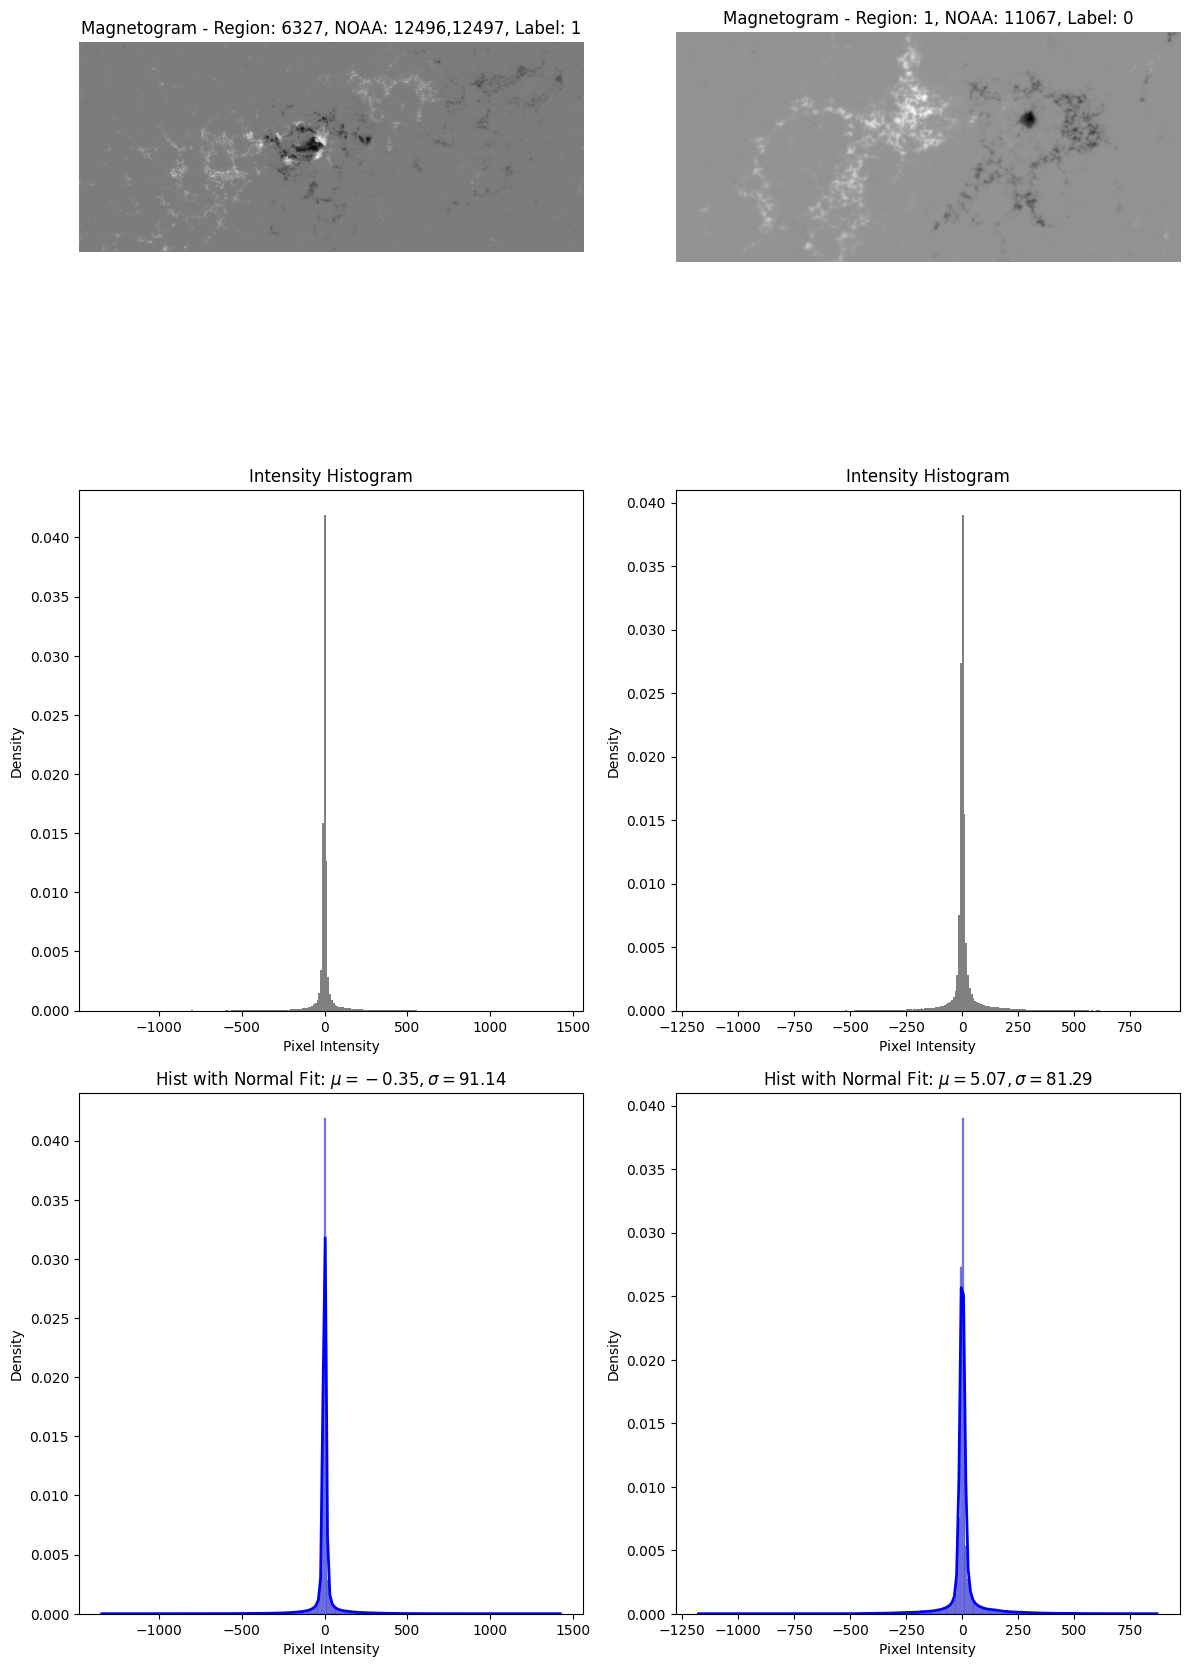

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm

def plot_sampled_magnetograms_with_fits(df):
    # Sample one magnetogram for label 1 and one for label 0
    sample_label_1 = df[df['label'] == 1].sample(n=1)
    sample_label_0 = df[df['label'] == 0].sample(n=1)

    # Combine the two samples into one DataFrame for easier iteration
    samples_combined = pd.concat([sample_label_1, sample_label_0])

    # Setup the 3x2 grid
    fig, axes = plt.subplots(3, 2, figsize=(12, 18))  # Adjust the figure size as necessary

    for i, (index, row) in enumerate(samples_combined.iterrows()):
        image = row['magnetogram']
        region_number = row['region_no']
        noaa_number = row['NOAA_ARS']
        label = row['label']

        # Plot magnetogram image
        ax_image = axes[0, i]
        ax_image.imshow(image, cmap='gray')
        ax_image.set_title(f'Magnetogram - SHARP Region No: {region_number}, NOAA Number: {noaa_number}, Label: {label}')
        ax_image.axis('off')

        # Plot intensity histogram
        ax_hist = axes[1, i]
        ax_hist.hist(image.ravel(), bins=256, color="gray", density=True)
        ax_hist.set_title('Intensity Histogram')
        ax_hist.set_xlabel('Pixel Intensity')
        ax_hist.set_ylabel('Density')

        # Histogram with fitted normal distribution using Seaborn
        ax_fit = axes[2, i]
        data = image.ravel()
        sns.histplot(data, bins=256, kde=True, color="blue", ax=ax_fit, stat="density", line_kws={'linewidth': 2})
        mu, std = norm.fit(data)
        ax_fit.set_title(f'Hist with Normal Fit: $\mu={mu:.2f}, \sigma={std:.2f}$')
        ax_fit.set_xlabel('Pixel Intensity')
        ax_fit.set_ylabel('Density')

    plt.tight_layout()
    plt.show()


plot_sampled_magnetograms_with_fits(magnetograms)
